In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
from scipy.integrate import dblquad
import scipy.stats as stats

In [2]:
# Import modules
import os
import arviz as az
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Import functions
from cmdstanpy import CmdStanModel
from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

# Create ./stan folder if does not exists
if not os.path.exists("./stan/lev"):
    os.mkdir("./stan/lev")

In [3]:
from mpmath import mp
mp.dps = 50

In [4]:
def prior_kernel(s,t):
    return np.exp(-((t-s)/5)**2)+0.0001*(s==t)
sigma = 1
T = np.linspace(1, 288, 288)
K = np.fromfunction(np.vectorize(lambda s, t: prior_kernel(T[s], T[t])), (T.shape[0], T.shape[0]), dtype=int)


In [17]:
def get_K0():
        tau = np.where(T0==1)[0]
        K_tau=K[:, tau]
        K_tau_tau = K[tau[:, None], tau]
        
        if np.linalg.det(K_tau_tau)==0:
            K_tau_tau = K_tau_tau+0.0001*np.eye(len(tau))
            
        return K- np.dot(np.dot(K_tau, np.linalg.inv(K_tau_tau)), K_tau.T)
K0=get_K0()+np.eye(288)*0.00001

In [5]:
df=pd.read_csv("average_curves.csv",index_col="idx")
df

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
idx,,,,,,,,,,,,,,,,,,,,,
pat_number,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,150.000000,151.000000,152.000000,153.000000,154.000000,155.000000,156.000000,157.000000,158.000000,159.000000
severity,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
constancy,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
age,58.000000,59.000000,62.000000,65.000000,65.000000,70.000000,66.000000,74.000000,58.000000,74.000000,...,68.000000,49.000000,51.000000,66.000000,45.000000,74.000000,67.000000,59.000000,34.000000,72.000000
gender,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,-0.981659,-1.076615,-1.332550,-1.058805,-0.923807,-1.109480,-1.743754,-1.184359,-1.359995,-1.107242,...,-1.485589,-1.074087,-1.003103,-0.996204,-1.740179,-1.447827,-1.043098,-1.684661,-1.077221,-1.393487
284,-0.993531,-1.078280,-1.332549,-1.044116,-0.923762,-1.109441,-1.743714,-1.217882,-1.360021,-1.116414,...,-1.486356,-1.074077,-1.002612,-0.994606,-1.740226,-1.445859,-1.042748,-1.684662,-1.077203,-1.393533
285,-0.997926,-1.079618,-1.332558,-1.019142,-0.923818,-1.109399,-1.743523,-1.224489,-1.360155,-1.127783,...,-1.487368,-1.074091,-1.003404,-0.994287,-1.740254,-1.440550,-1.042608,-1.684662,-1.077191,-1.393537


In [6]:
# matching to face data availability:
df_levadopa = pd.read_csv('levodopa_data.csv')
df = pd.read_csv('average_curves.csv',index_col='idx')

x = df.iloc[7:,df_levadopa['Pat Number'].astype(int)]
y = df.iloc[1,df_levadopa['Pat Number'].astype(int)]

<BarContainer object of 10 artists>

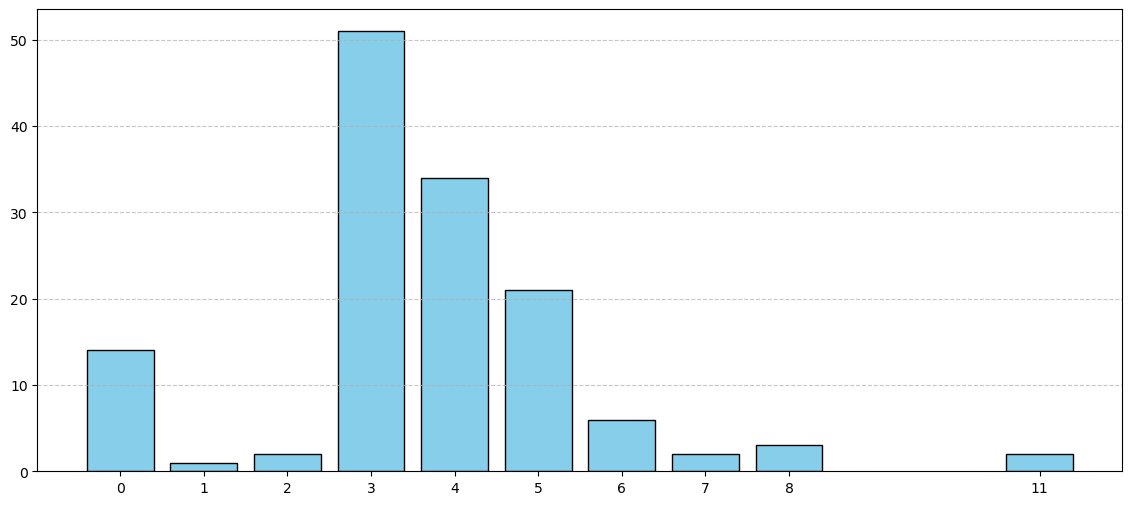

In [7]:

unique_values, counts = np.unique(df_levadopa["Levodopa Dosis"], return_counts=True)

# Plot histogram
plt.figure(figsize=(14, 6))
plt.xticks(unique_values) 
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.bar(unique_values, counts, color='skyblue', edgecolor='black')


In [9]:
y23 = np.copy(y)
y23[y == 1] = 0
y23[y == 2] = 1
y23[y == 3] = 1
np.unique(y23)

array([0., 1.])

In [10]:
#lev_g=np.percentile(df_levadopa["Levadopa Dosis"],[50,100],axis=0)

In [11]:
lev_g=np.zeros(136)
lev_g[df_levadopa["Levodopa Dosis"]>=5]=1
lev_g

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [12]:
T0=pd.read_csv("chain_fixed.csv") #from the sample with sigma=1, L=5, alpha=1
T0,_=stats.mode(T0[500:], axis=0)
T0=T0.flatten().tolist()

In [13]:
np.unique(df_levodopa["Levodopa Dosis"])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 11], dtype=int64)

## Mixed model with random effects on levadopa treatments 
Let the model be $$Y_{i}=\int_{t} x_i(t) \beta(t)dt= \int_{t} x_i(t) \theta(t) dt + \int_{t} \lambda_i x_i(t) \gamma(t) dt+ \varepsilon_i$$
such that we consider a random effect specific for the age of the patients. Namely:
$$ \theta|\mu,\sigma^{2}, T_{0} \sim GP(0,\sigma^{2}K^{0})$$ 
$$ \gamma_j|  \sim \mathcal{N}(0, \sigma_0^{2}K^{0})\text{ random effect}$$
$$ \varepsilon_i \sim \mathcal{N} (0, \sigma^2)$$

The covariates are:
- functional variable $x_i(t)$  $\quad i=1:159$ ,$\quad t=1:288$
- variable $\lambda_{i} = \mathbb{1}_{\text{lev doses of pat i }  \geq 5 }$  $\quad i=1:159$






In [14]:
# Set sigma and sigma0 to 1
mixII = """
data {
    int<lower=1> N; 
    int<lower=0> g; 
    matrix[N, g] X; 
    vector[N] Y; 
    vector[N] lev; // Group membership indicator for each observation
    matrix[g, g] K0;
    vector[g] mu;
    real <lower=0.01> sigma;
    real <lower=0.01> sigma0;
}

parameters {
    vector[g] beta; 
    vector[g] gamma0;
    
}

model {
    beta ~ multi_normal(mu, sigma*K0);
    gamma0 ~ multi_normal(mu, sigma0*K0);  //rand eff
   
    for (n in 1:N) {
        real integral_fix = dot_product(beta, X[n]);
        real integral0 = dot_product(gamma0, X[n]);
        Y[n] ~ normal(integral_fix+lev[n]*integral0, sigma); // mixed eff likelihood
    }
}



"""

# Write stan model to file
stan_file = "./stan/lev/mixII.stan"
with open(stan_file, "w") as f:
    print(mixII, file=f)

# Compile stan model
mixII= CmdStanModel(stan_file=stan_file)

16:20:22 - cmdstanpy - INFO - compiling stan file C:\Users\Silvia\Desktop\23-24\BAYES\progetto\stan\lev\mixII.stan to exe file C:\Users\Silvia\Desktop\23-24\BAYES\progetto\stan\lev\mixII.exe
16:21:33 - cmdstanpy - INFO - compiled model executable: C:\Users\Silvia\Desktop\23-24\BAYES\progetto\stan\lev\mixII.exe


In [18]:

data = {
    "N": len(y23),
    "g": x.shape[0],
    "X": np.transpose(x),
    "Y": y23,
    "lev": lev_g,
    "K0": K0,
    "mu": np.zeros(288),
    "sigma": 1, 
    "sigma0": 1,
}  
mixII_fit = mixII.sample(data=data, chains=1, adapt_delta=0.9, iter_warmup=100, iter_sampling=500)


# Convert to arviz data type
mixII_data = az.from_cmdstanpy(mixII_fit)

16:22:15 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

08:47:50 - cmdstanpy - INFO - CmdStan done processing.


08:47:50 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 500 iterations at max treedepth (100.0%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.


In [ ]:
#16 ore :')

In [21]:
mixII_data.to_netcdf('./stan/lev/outputII_file.nc')

'./stan/lev/outputII_file.nc'

C:\Users\Silvia\Documents\Anaconda\lib\site-packages\arviz\plots\traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (288), generating only 20 plots
  warnings.warn(


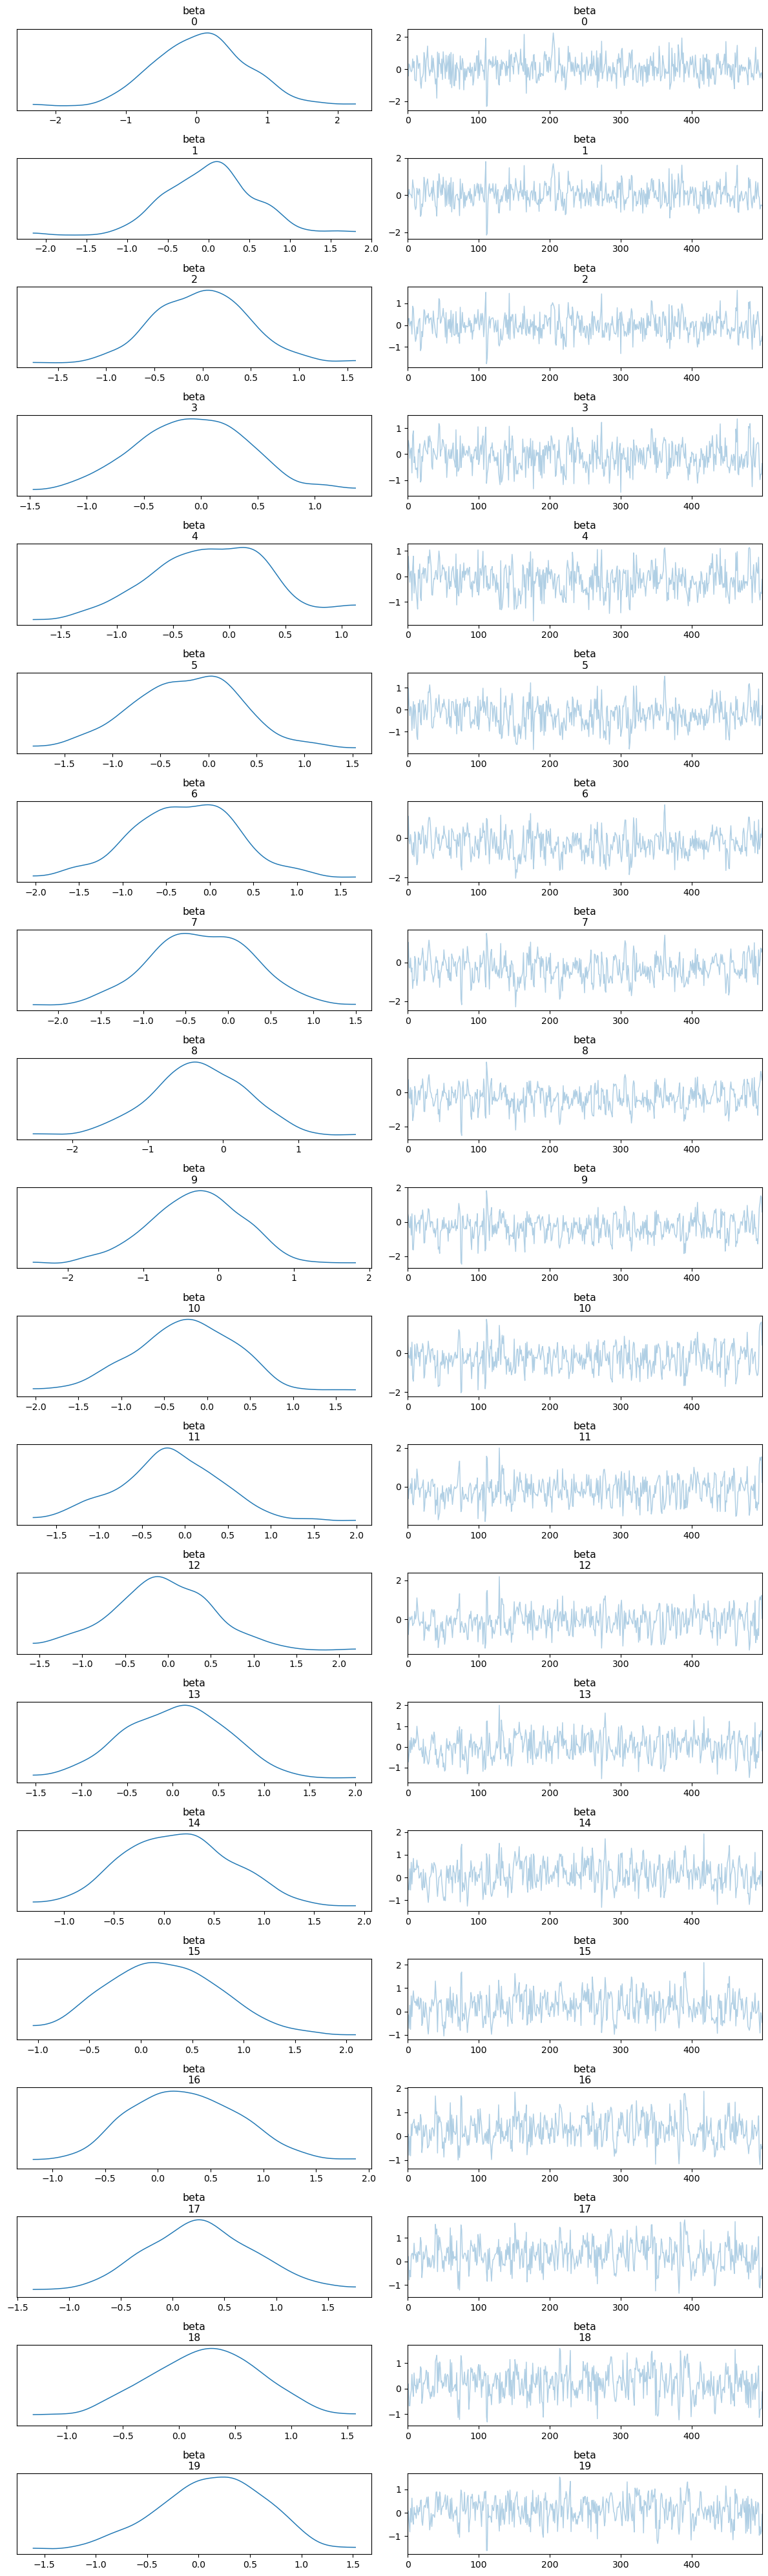

In [22]:
az.plot_trace(mixII_data, var_names=[ "beta"], compact=False)
plt.tight_layout()
plt.savefig('./stan/lev/trace_plot_beta.pdf') 
plt.show()

C:\Users\Silvia\Documents\Anaconda\lib\site-packages\arviz\plots\traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (288), generating only 20 plots
  warnings.warn(


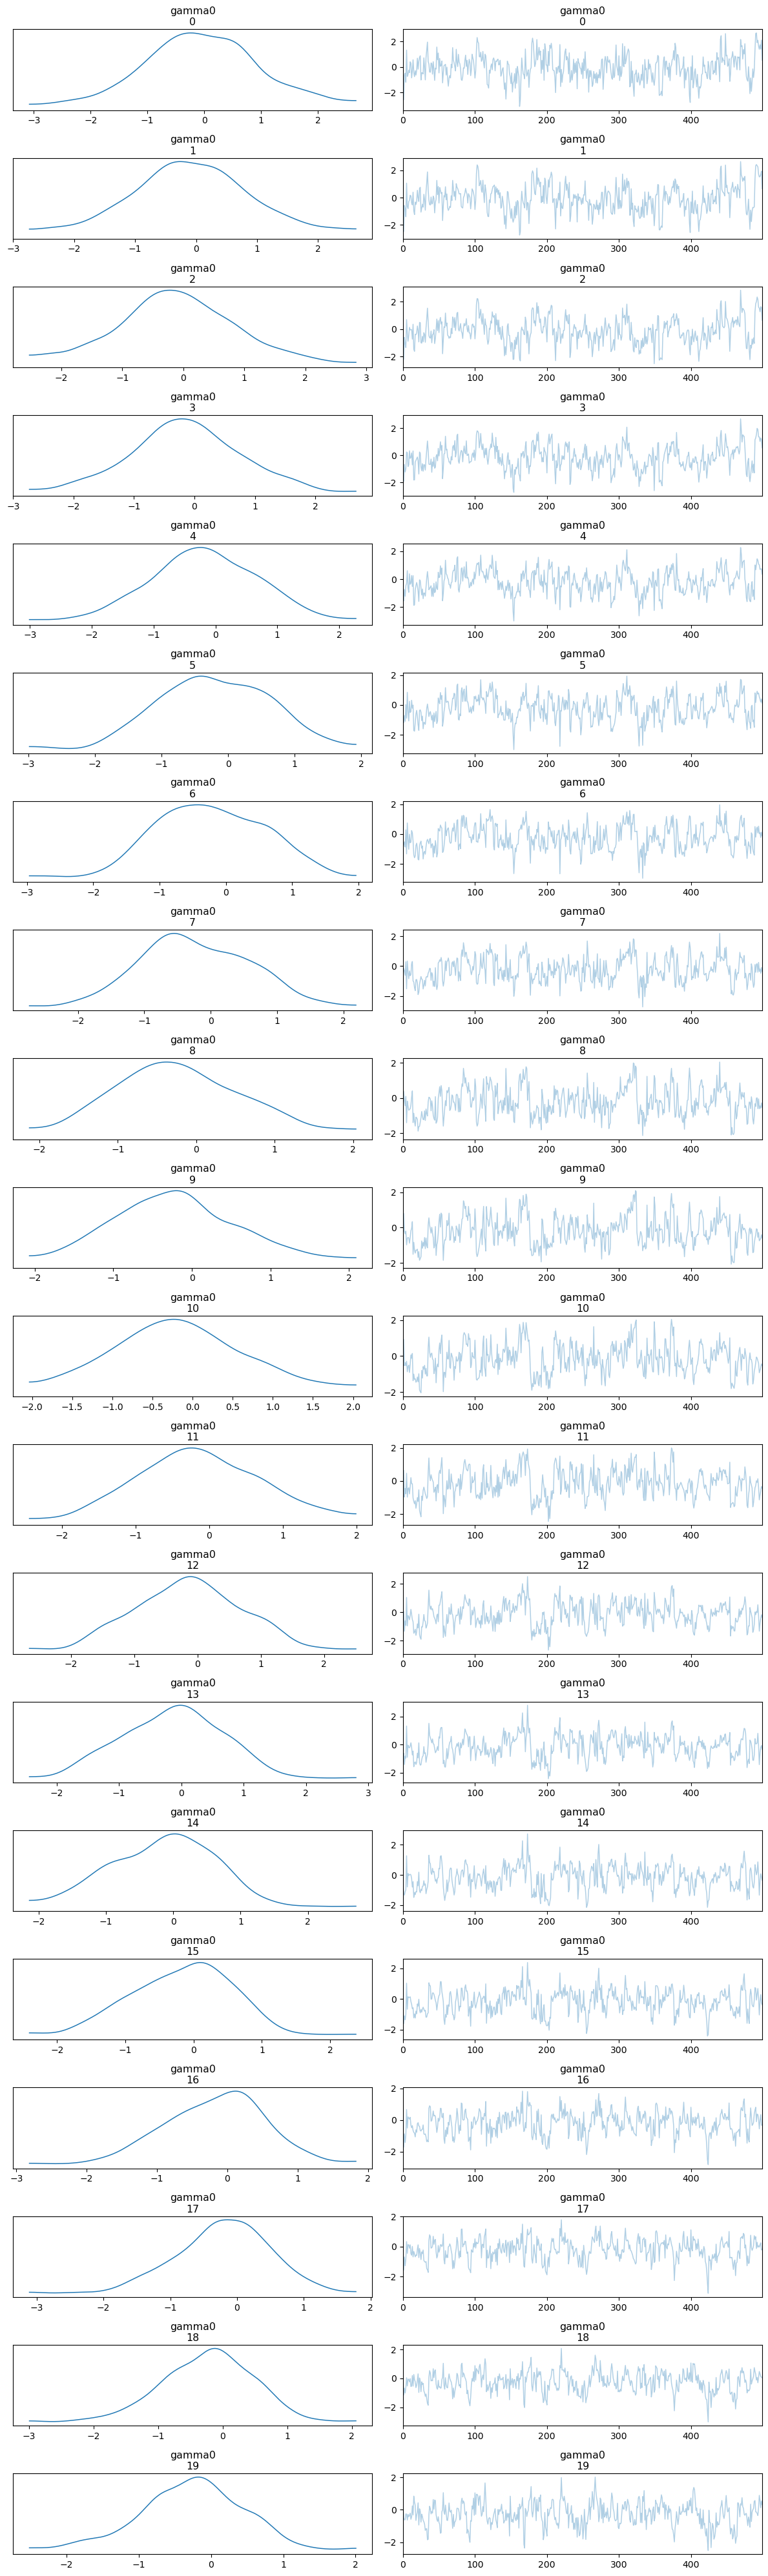

In [23]:
az.plot_trace(mixII_data, var_names=[ "gamma0"], compact=False)
plt.tight_layout()
plt.savefig('./stan/lev/trace_plot_gamma0.pdf') 
plt.show()

In [50]:
beta=np.array(mixII_data.posterior.beta)[0]
gamma0=np.array(mixII_data.posterior.gamma0)[0]
beta_hat=np.mean(beta[100:], axis=0)
gamma0_hat=np.mean(gamma0[100:], axis=0)

In [52]:
def compute_predictions(new_data):
    predictions = []
    for i in range(136):
        integral_fix = np.trapz(beta_hat, new_data.iloc[i],T)
        integral0 = np.trapz(gamma0_hat,new_data.iloc[i],T)
        predictions.append(integral_fix + integral0 *lev_g[i])
       
    return np.array(predictions)


In [53]:
fitted=compute_predictions(np.transpose(x))

In [54]:
logit_fitted = scipy.special.expit(fitted)
labels = np.zeros(len(fitted))
ones= np.where(logit_fitted >0.5)[0]
labels[ones] = np.ones(len(ones)) 
acc = np.sum(labels==y23)/len(y23)

In [55]:
acc

0.5

Text(0, 0.5, 'Predicted Target')

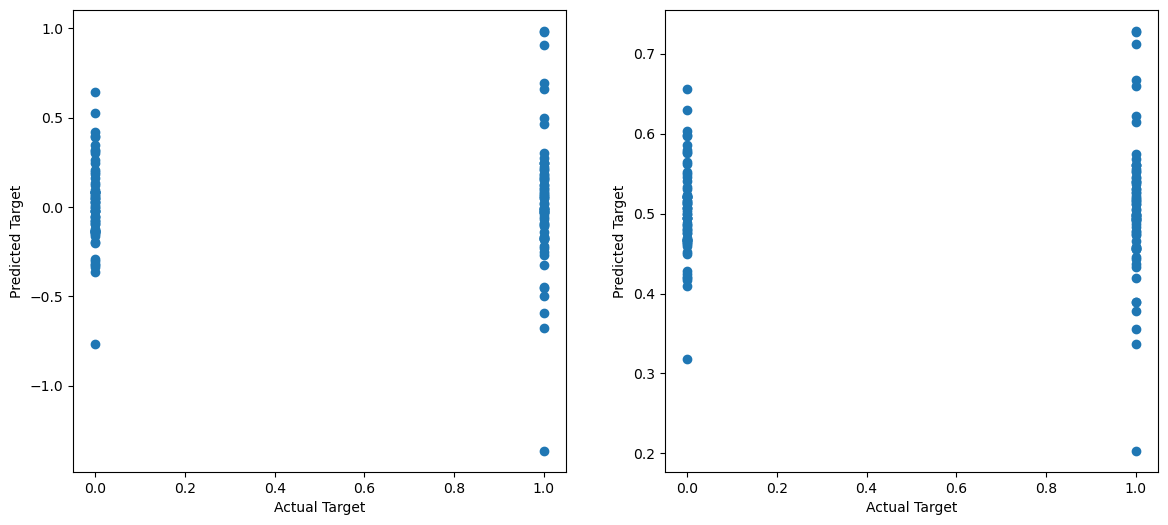

In [57]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(y23,fitted)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')
plt.subplot(1, 2,2)
logit_fitted = scipy.special.expit(fitted)
plt.scatter(y23,logit_fitted)
plt.xlabel('Actual Target')
plt.ylabel('Predicted Target')